<a href="https://colab.research.google.com/github/AmareswarReddy/AlgoBots/blob/main/nifty_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


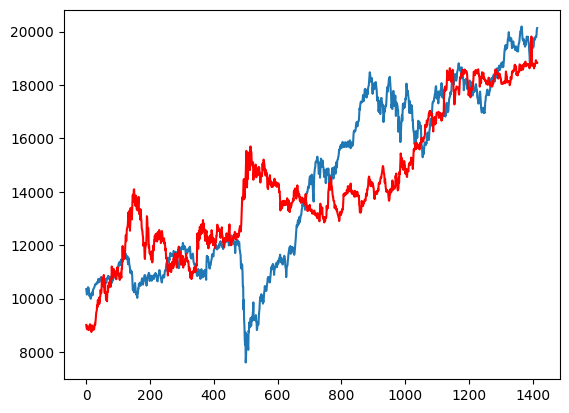

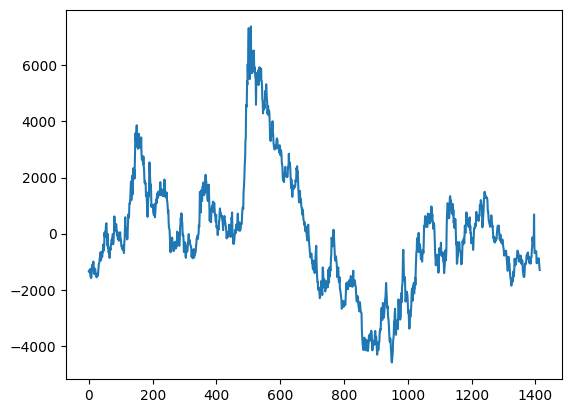

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


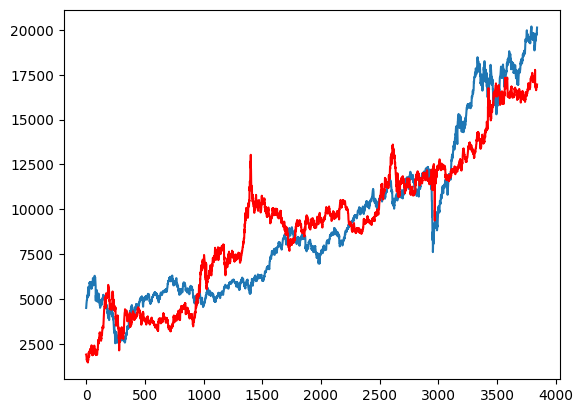

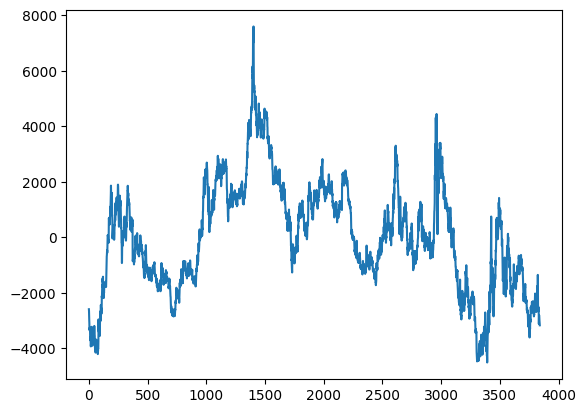

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


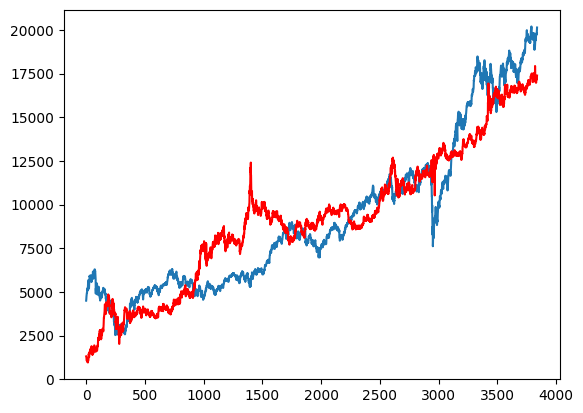

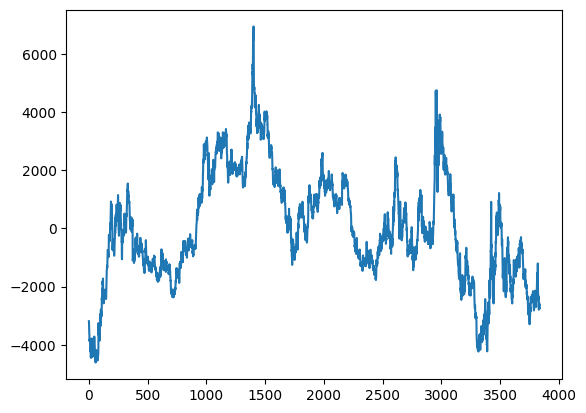

In [1]:
#if running on google colab
!pip install yfinance
#%%
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn import linear_model
period='1500d'
interval='1d'
data = yf.download('^NSEI', period=period, interval=interval)
nifty = data[:]
data_dollar = yf.download('INR=X', period=period, interval=interval)
dollar = data_dollar[:]


sp=np.array(nifty.index)
sc=np.array(dollar.index)
k=np.intersect1d(np.array(sp),np.array(sc))
w=[]
for strike in sp:
    if strike in k:
        w=w+[True]
    else:
        w=w+[False]
v=[]
for strike in sc:
    if strike in k:
        v=v+[True]
    else:
        v=v+[False]
nifty=nifty[w].copy()
dollar=dollar[v].copy()
x=np.zeros((len(dollar),1))
x[:,0] = dollar['Close']
y_nifty= np.array(nifty[['Close']])
regr = linear_model.LinearRegression()
regr.fit(x,y_nifty)
coint_nifty =  regr.predict(x)
indicator=coint_nifty-y_nifty


plt.plot(np.array(nifty['Close']))
plt.plot(coint_nifty,'r')
plt.show()
plt.plot(indicator)
plt.show()

# %%
# for crude and dollar to be used to find cointegrated nifty
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import pickle
period='10000d'
interval='1d'
data = yf.download('^NSEI', period=period, interval=interval)
nifty = data[:]
data_dollar = yf.download('INR=X', period=period, interval=interval)
data_crude = yf.download('CL=F', period=period, interval=interval)
dollar = data_dollar[:]
crude =data_crude[:]
def clean_data(nifty,dollar,crude):
    sp=np.array(nifty.index)
    sc=np.array(dollar.index)
    sl=np.array(crude.index)
    k=np.intersect1d(np.array(sp),np.array(sc))
    k2=np.intersect1d(np.array(sp),np.array(sl))
    final_k=np.intersect1d(k,k2)
    w=[]
    for strike in sp:
        if strike in final_k:
            w=w+[True]
        else:
            w=w+[False]
    v=[]
    for strike in sc:
        if strike in final_k:
            v=v+[True]
        else:
            v=v+[False]
    u=[]
    for strike in sl:
        if strike in final_k:
            u=u+[True]
        else:
            u=u+[False]
    nifty=nifty[w].copy()
    dollar=dollar[v].copy()
    crude=crude[u].copy()
    return nifty,dollar,crude
nifty,dollar,crude=clean_data(nifty,dollar,crude)
x=np.zeros((len(dollar),2))
x[:,0] = dollar['Close']
x[:,1] = crude['Close']
y_nifty= np.array(nifty[['Close']])
regr = linear_model.LinearRegression()
regr.fit(x,y_nifty)
coint_nifty =  regr.predict(x)
indicator=coint_nifty-y_nifty


plt.plot(np.array(nifty['Close']))
plt.plot(coint_nifty,'r')
plt.show()
plt.plot(indicator)
plt.show()
#%%
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
period='10000d'
interval='1d'
data = yf.download('^NSEI', period=period, interval=interval)
nifty = data[:]
data_dollar = yf.download('INR=X', period=period, interval=interval)
data_crude = yf.download('CL=F', period=period, interval=interval)
dollar = data_dollar[:]
crude =data_crude[:]
data_gold=yf.download('GC=F', period=period, interval=interval)
gold=data_gold[:]
def clean_data(nifty,dollar,crude,gold):
    sp=np.array(nifty.index)
    sc=np.array(dollar.index)
    sl=np.array(crude.index)
    sa=np.array(gold.index)
    k=np.intersect1d(np.array(sp),np.array(sc))
    k1=np.intersect1d(k,np.array(sa))
    k2=np.intersect1d(k1,np.array(sl))
    final_k=k2
    w=[]
    for strike in sp:
        if strike in final_k:
            w=w+[True]
        else:
            w=w+[False]
    v=[]
    for strike in sc:
        if strike in final_k:
            v=v+[True]
        else:
            v=v+[False]
    u=[]
    for strike in sl:
        if strike in final_k:
            u=u+[True]
        else:
            u=u+[False]
    lofa=[]
    for strike in sa:
        if strike in final_k:
            lofa=lofa+[True]
        else:
            lofa=lofa+[False]
    nifty=nifty[w].copy()
    dollar=dollar[v].copy()
    crude=crude[u].copy()
    gold=gold[lofa].copy()
    return nifty,dollar,crude,gold
nifty,dollar,crude,gold=clean_data(nifty,dollar,crude,gold)
x=np.zeros((len(dollar),3))
x[:,0] = dollar['Close']
x[:,1] = crude['Close']
x[:,2] = gold['Close']
y_nifty= np.array(nifty[['Close']])
regr = linear_model.LinearRegression()
regr.fit(x,y_nifty)
coint_nifty =  regr.predict(x)
indicator=coint_nifty-y_nifty


plt.plot(np.array(nifty['Close']))
plt.plot(coint_nifty,'r')
plt.show()
plt.plot(indicator)
plt.show()